# STEP : 1 :- Understanding the Business Problem.

## Data Description : 

The Diamond dataset contains information about diamonds, including their physical attributes and prices. The key features in the dataset are:

Carat: The weight of the diamond.

Cut: The quality of the diamond cut (e.g., Fair, Good, Very Good, Premium, Ideal).

Color: The color grade of the diamond, with letters indicating the quality (e.g., D (best), E, F, ..., J (worst)).

Clarity: The clarity grade of the diamond (e.g., I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best)).

Depth: The total depth percentage of the diamond.

Table: The width of the diamond's top as a percentage of its widest point.

Price: The price of the diamond in US dollars.

X: Length of the diamond in mm.

Y: Width of the diamond in mm.

Z: Depth of the diamond in mm.


In [1]:
!pip install --upgrade numpy pandas matplotlib seaborn

In [2]:
!pip install --upgrade numexpr bottleneck

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("All libraries imported successfully!")

All libraries imported successfully!


### Load the dataset and check the columns of the data.

# STEP : 3 :- Data Collection & Data Management.

In [4]:
df = pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Check the columns of the data.
### Check if there are any unnecessary columns.

In [5]:
print(df.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


### check the data types of for the columns

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


### Check for Unique Values

In [7]:
print(df.nunique())

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64


### Check for summary statistics

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


### Check for duplicate rows.

In [9]:
duplicate_ = df.duplicated()
print(duplicate_.any())

True


### Check for missing values.

In [10]:
df.isna()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


### Calculate percentage(%) of misiing values for each column.

In [11]:
df.isna().mean()*100

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

## Let's do univariate analysis.

In [12]:
data = df.copy()
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
data.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### univariate analysis

In [15]:
# univariate analysis
import matplotlib.pyplot as plt
def cont_vis_analysis(data,col):
    fig,axes = plt.subplots(1,3,figsize=(8,3),layout = "constrained")
    fig.suptitle("Continous data distributions")
    
    axes[0].set_title("Histogram")
    sns.histplot(data[col],ax=axes[0])
    
    axes[1].set_title("KDE Plot")
    sns.kdeplot(data[col],ax=axes[1])
    
    axes[2].set_title("Box plot")
    sns.boxplot(data[col],ax=axes[2])
    
    fig.show()
    
def cont_non_vis_analysis(data,col):
    series = data[col]
    print(series.agg(["count","max","min","mean","median","var","std","skew","kurt"]).round(2))
    print()

C:\Users\SRAVANTHI\AppData\Local\Temp\ipykernel_27220\3505233997.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


count     53940.00
max           5.01
min           0.20
mean          0.80
median        0.70
var           0.22
std           0.47
skew          1.12
kurt          1.26
Name: carat, dtype: float64



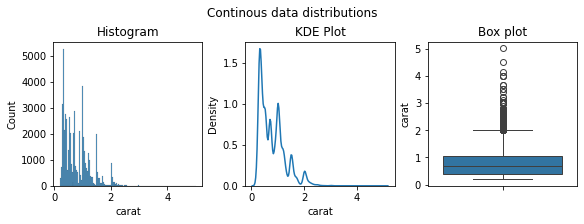

In [16]:
cont_vis_analysis(data,"carat")
cont_non_vis_analysis(data,"carat")

C:\Users\SRAVANTHI\AppData\Local\Temp\ipykernel_27220\3505233997.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


count     53940.00
max          79.00
min          43.00
mean         61.75
median       61.80
var           2.05
std           1.43
skew         -0.08
kurt          5.74
Name: depth, dtype: float64



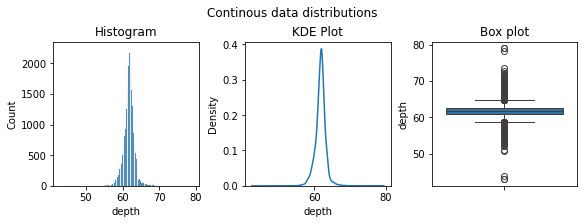

In [17]:
cont_vis_analysis(data,"depth")
cont_non_vis_analysis(data,"depth")

C:\Users\SRAVANTHI\AppData\Local\Temp\ipykernel_27220\3505233997.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


count     53940.00
max          95.00
min          43.00
mean         57.46
median       57.00
var           4.99
std           2.23
skew          0.80
kurt          2.80
Name: table, dtype: float64



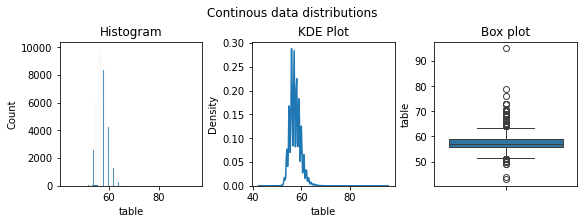

In [18]:
cont_vis_analysis(data,"table")
cont_non_vis_analysis(data,"table")

C:\Users\SRAVANTHI\AppData\Local\Temp\ipykernel_27220\3505233997.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


count        53940.00
max          18823.00
min            326.00
mean          3932.80
median        2401.00
var       15915629.42
std           3989.44
skew             1.62
kurt             2.18
Name: price, dtype: float64



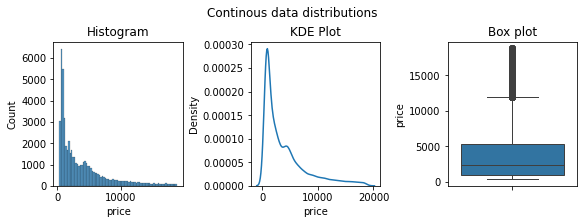

In [19]:
cont_vis_analysis(data,"price")
cont_non_vis_analysis(data,"price")

C:\Users\SRAVANTHI\AppData\Local\Temp\ipykernel_27220\3505233997.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


count     53940.00
max          10.74
min           0.00
mean          5.73
median        5.70
var           1.26
std           1.12
skew          0.38
kurt         -0.62
Name: x, dtype: float64



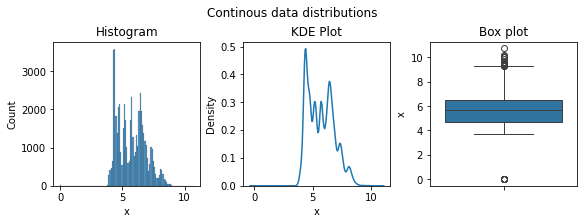

In [20]:
cont_vis_analysis(data,"x")
cont_non_vis_analysis(data,"x")

C:\Users\SRAVANTHI\AppData\Local\Temp\ipykernel_27220\3505233997.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


count     53940.00
max          58.90
min           0.00
mean          5.73
median        5.71
var           1.30
std           1.14
skew          2.43
kurt         91.21
Name: y, dtype: float64



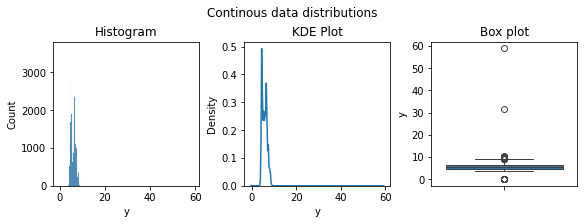

In [21]:
cont_vis_analysis(data,"y")
cont_non_vis_analysis(data,"y")

C:\Users\SRAVANTHI\AppData\Local\Temp\ipykernel_27220\3505233997.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


count     53940.00
max          31.80
min           0.00
mean          3.54
median        3.53
var           0.50
std           0.71
skew          1.52
kurt         47.09
Name: z, dtype: float64



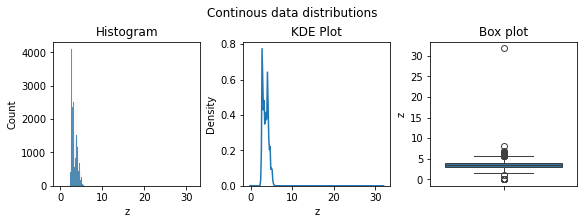

In [22]:
cont_vis_analysis(data,"z")
cont_non_vis_analysis(data,"z")

In [23]:
def cat_disc_vis_analysis(data,col):
    print("value counts for ",col)
    print(data[col].value_counts())
    print("null values = ",data[col].isna().sum())
    fig,axes = plt.subplots(1,2,figsize=(8,3),layout="constrained")
    fig.suptitle("categorical/discrete numerical data distributions")
    
    axes[0].set_title("bar plot")
    sns.countplot(x=col,data=data,ax=axes[0])
    
    axes[1].set_title("pie chart")
    vc_data = data[col].value_counts()
    axes[1].pie(vc_data,labels = vc_data,autopct = "%1.1f%%")
    
    fig.show()

value counts for  cut
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
null values =  0


C:\Users\SRAVANTHI\AppData\Local\Temp\ipykernel_27220\2399814924.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


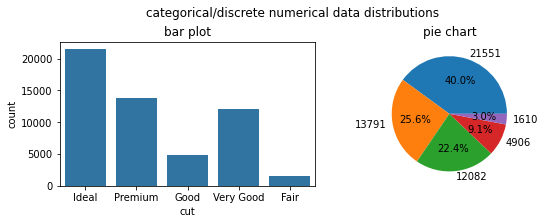

In [24]:
cat_disc_vis_analysis(data,'cut')

value counts for  color
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
null values =  0


C:\Users\SRAVANTHI\AppData\Local\Temp\ipykernel_27220\2399814924.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


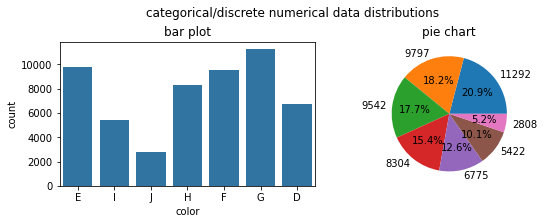

In [25]:
cat_disc_vis_analysis(data,'color')

value counts for  clarity
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64
null values =  0


C:\Users\SRAVANTHI\AppData\Local\Temp\ipykernel_27220\2399814924.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


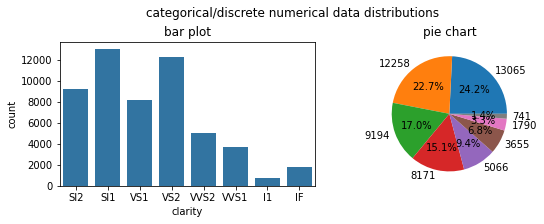

In [26]:
cat_disc_vis_analysis(data,'clarity')

#### Bivariate analysis

In [27]:
def cont_cont_vis_analysis(data,col1,col2):
    print(f"covariance = {data[col1].cov(data[col2])}")
    print(f"correaltion = {data[col1].corr(data[col2])}")
    sns.scatterplot(x=col1,y=col2,data=data)
    plt.show()
    plt.tight_layout()

covariance = 1742.765364265118
correaltion = 0.9215913011934762


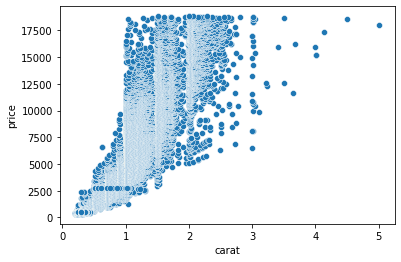

<Figure size 432x288 with 0 Axes>

In [28]:
cont_cont_vis_analysis(data,"carat","price")

covariance = -60.85371213642414
correaltion = -0.010647404584142976


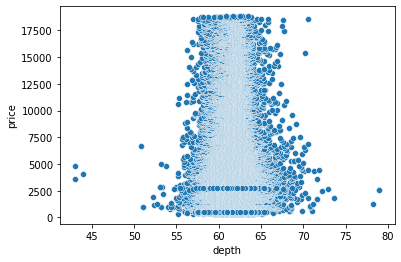

<Figure size 432x288 with 0 Axes>

In [29]:
cont_cont_vis_analysis(data,"depth","price")

covariance = 1133.3180640679032
correaltion = 0.12713390212174203


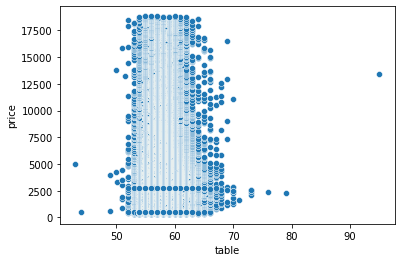

<Figure size 432x288 with 0 Axes>

In [30]:
cont_cont_vis_analysis(data,"table","price")

covariance = 3958.021490783263
correaltion = 0.8844351610161282


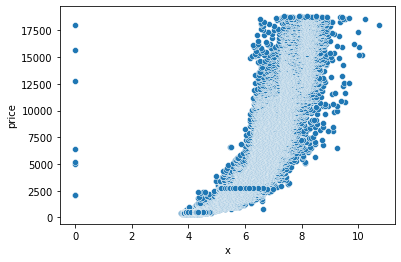

<Figure size 432x288 with 0 Axes>

In [31]:
cont_cont_vis_analysis(data,"x","price")

covariance = 3943.2708104319586
correaltion = 0.8654208978641873


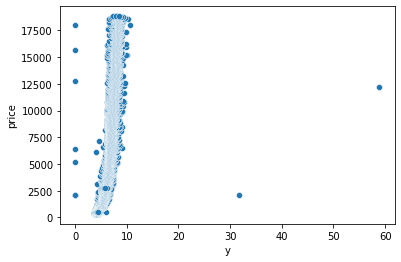

<Figure size 432x288 with 0 Axes>

In [32]:
cont_cont_vis_analysis(data,"y","price")

covariance = 2424.712612970331
correaltion = 0.8612494438514482


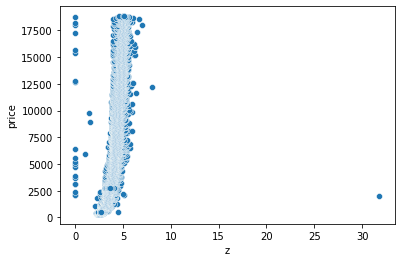

<Figure size 432x288 with 0 Axes>

In [33]:
cont_cont_vis_analysis(data,"z","price")

In [34]:
def cont_disc_vis_analysis(data,col1,col2):
    sns.boxplot(x=col1,y=col2,data=data)
    plt.show()
    plt.tight_layout()

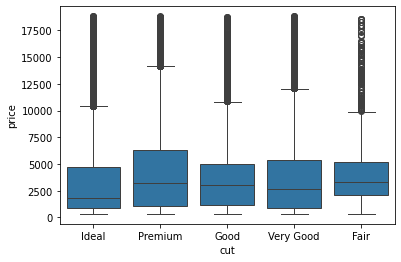

<Figure size 432x288 with 0 Axes>

In [35]:
cont_disc_vis_analysis(data,"cut","price")

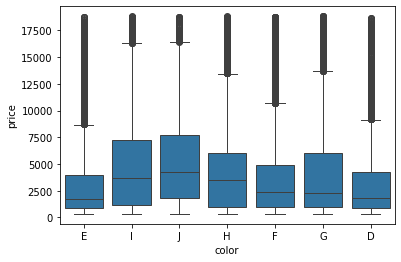

<Figure size 432x288 with 0 Axes>

In [36]:
cont_disc_vis_analysis(data,"color","price")

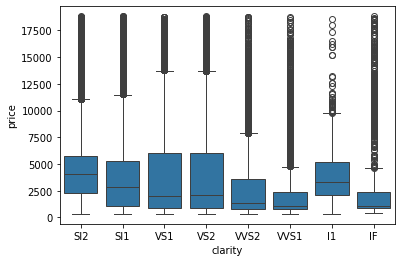

<Figure size 432x288 with 0 Axes>

In [37]:
cont_disc_vis_analysis(data,"clarity","price")

# STEP : 4(A) :- Data PreProcessing 

In [38]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [39]:
data.duplicated().sum()
data = data.drop_duplicates()
print(data.info())
# So, at first we have 53940.
# After removing duplicates , We have 53794 rows.

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB
None


In [40]:
data['volume'] = data['x'] * data['y'] * data['z']

In [41]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [42]:
categorical_cols = ['cut', 'color', 'clarity']
# Define custom orders
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']  # from worst to best
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']  # from worst to best
encoder = OrdinalEncoder(categories=[cut_order, color_order, clarity_order], 
                         handle_unknown='use_encoded_value', unknown_value=-1)
# Create the encoder
data_encoded = data.copy()
data_encoded[categorical_cols] = encoder.fit_transform(data[categorical_cols])
# Show the encoded data
data_encoded.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,4.0,5.0,1.0,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,3.0,5.0,2.0,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,1.0,5.0,4.0,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,3.0,1.0,3.0,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,1.0,0.0,1.0,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [43]:
encoder.categories_

[array(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], dtype=object),
 array(['J', 'I', 'H', 'G', 'F', 'E', 'D'], dtype=object),
 array(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
       dtype=object)]

In [44]:
# Create a copy of encoded data
scaled_data = data_encoded.copy()
# Features to scale
features_to_scale = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 
                     'price', 'x', 'y', 'z', 'volume']
# Instantiate scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data[features_to_scale] = scaler.fit_transform(scaled_data[features_to_scale])

# View scaled data
scaled_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,-1.199402,0.981881,0.936990,-1.245973,-0.173495,-1.100486,-0.904462,-1.589399,-1.537553,-1.572574,-1.172273
1,-1.241651,0.085894,0.936990,-0.638750,-1.362393,1.585691,-0.904462,-1.642938,-1.660231,-1.742780,-1.219563
2,-1.199402,-1.706079,0.936990,0.575696,-3.390512,3.376475,-0.904211,-1.500168,-1.458689,-1.742780,-1.173874
3,-1.072656,0.085894,-1.414429,-0.031527,0.455922,0.242603,-0.902456,-1.366321,-1.318485,-1.288899,-1.063233
4,-1.030407,-1.706079,-2.002284,-1.245973,1.085338,0.242603,-0.902205,-1.241397,-1.213332,-1.118694,-0.996797


# STEP : 4(B) :- Train-Test-Split

In [45]:
x = scaled_data.drop(["price"],axis=1)
y = scaled_data["price"]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape) 
print(x_test.shape)
print(y_test.shape)

(43035, 10)
(43035,)
(10759, 10)
(10759,)


# STEP : 5 :-  Model Training

In [47]:
param_grid = {"n_estimators":[30,35,40,45,50],
            "max_depth":[10,11,12,13,14,15,16,17,18]}
rf = RandomForestRegressor(random_state=1)
grid_search = GridSearchCV(estimator = rf,param_grid=param_grid,cv=5,scoring ="r2")
grid_search.fit(x_train,y_train)
print("Best Parameters : ",grid_search.best_params_)
print("Best Scores : ",grid_search.best_score_)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)
# Evaluate
r2 = r2_score(y_test, y_pred)
print(f"Test R² Score: {r2:.3f} with params: {grid_search.best_params_}")
print("Model .score() on test data:", best_rf.score(x_test, y_test))

Best Parameters :  {'max_depth': 14, 'n_estimators': 50}
Best Scores :  0.9801283091188366
Test R² Score: 0.982 with params: {'max_depth': 14, 'n_estimators': 50}
Model .score() on test data: 0.9819574177684618


In [48]:
# Predictions
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

# Training Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Testing Metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print Results
print(f"Training MSE: {train_mse:.2f}")
print(f"Training R²: {train_r2:.3f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Testing R²: {test_r2:.3f}")

Training MSE: 0.01
Training R²: 0.993
Testing MSE: 0.02
Testing R²: 0.982


In [54]:
import pickle
# it allows you to serilize python object into a file.
with open('model_pickle','wb') as f:
    pickle.dump(best_rf,f)

In [56]:
!pip install joblib

In [57]:
import joblib
joblib.dump(best_rf,'model.pkl')

['model.pkl']